<a href="https://colab.research.google.com/github/Tsukkei/CCADMACL_EXAM_COM222ML/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCADMACL (Midterm Exam)

## Import the libraries

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [179]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

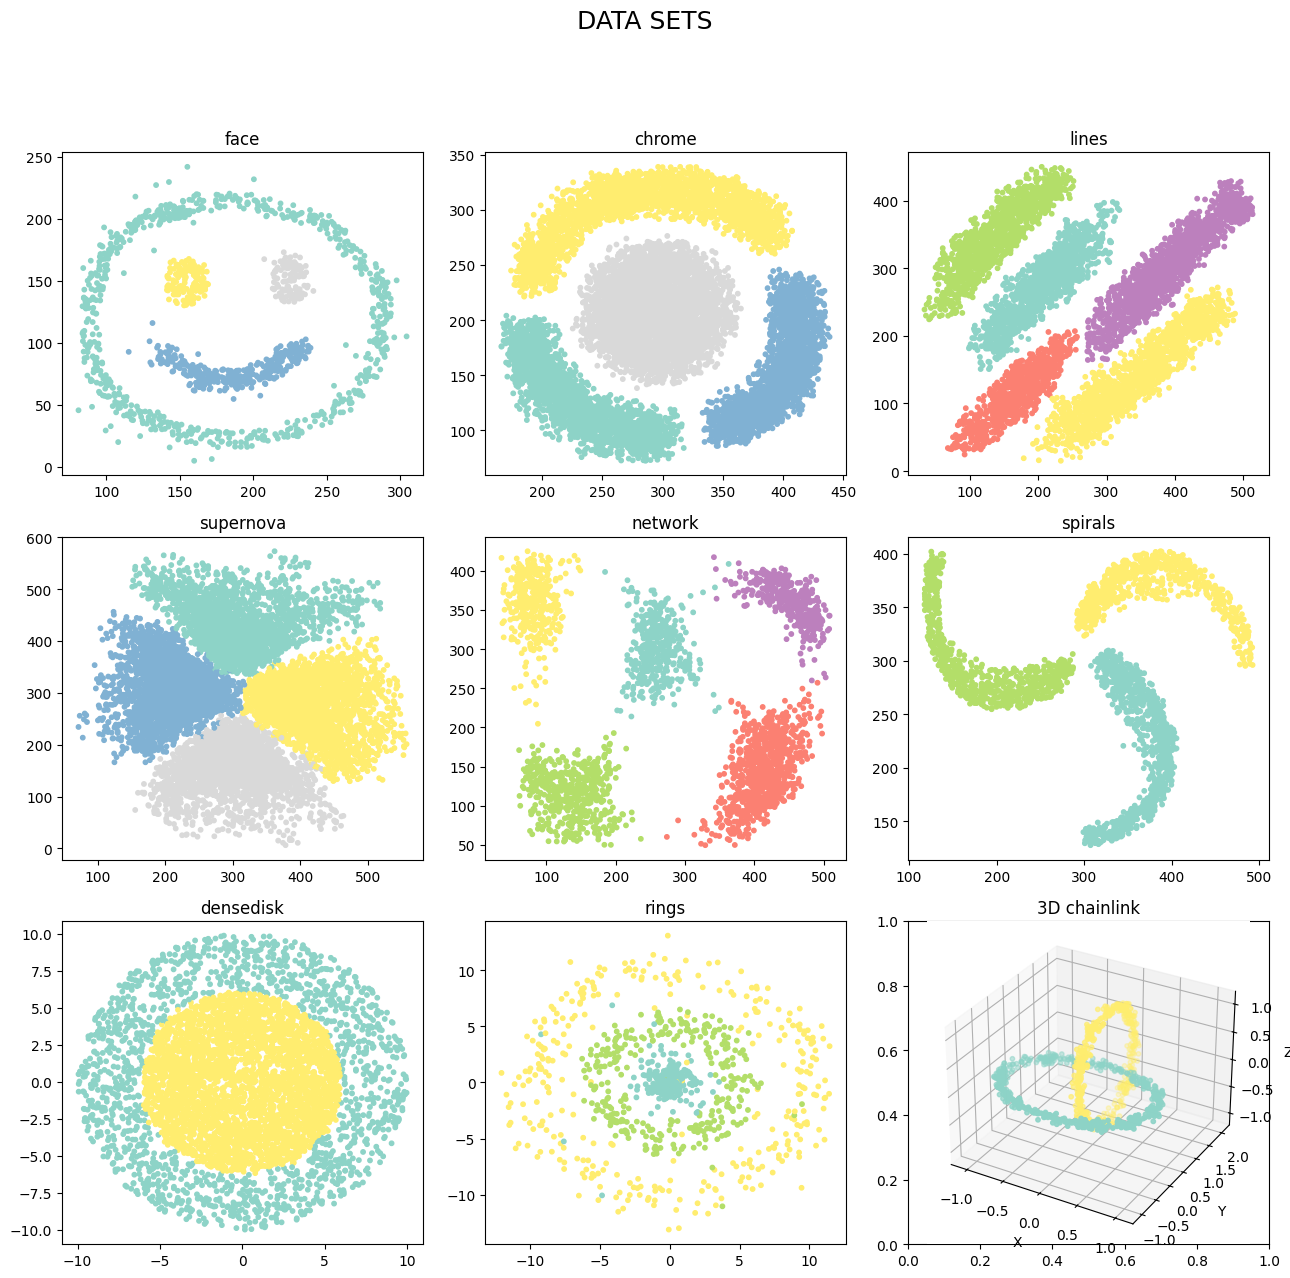

In [180]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [181]:
face_kmeans = face_df.copy()
chrome_kmeans = chrome_df.copy()
lines2_kmeans = lines2_df.copy()
supernova_kmeans = supernova_df.copy()
network_kmeans = network_df.copy()
spirals_kmeans = spirals_df.copy()
densedisk_kmeans = densedisk_df.copy()
rings_kmeans = rings_df.copy()
chainlink_kmeans = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [182]:
face_kmeans = face_kmeans.drop(columns=['color'])
chrome_kmeans = chrome_kmeans.drop(columns=['color'])
lines2_kmeans = lines2_kmeans.drop(columns=['color'])
supernova_kmeans = supernova_kmeans.drop(columns=['color'])
network_kmeans = network_kmeans.drop(columns=['color'])
spirals_kmeans = spirals_kmeans.drop(columns=['color'])
densedisk_kmeans = densedisk_kmeans.drop(columns=['color'])
rings_kmeans = rings_kmeans.drop(columns=['color'])
chainlink_kmeans = chainlink_kmeans.drop(columns=['color'])

3. Train a K-means model for each dataset.

In [183]:
kmeans_face = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans_chrome = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans_lines2 = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans_supernova = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans_network = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans_spirals = KMeans(n_clusters=3, random_state=0, n_init=1)
kmeans_densedisk = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_rings = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_chainlink = KMeans(n_clusters=2, random_state=0, n_init=10)

4. Add a "Cluster" column for each data set

In [184]:
face_kmeans['Cluster'] = kmeans_face.fit_predict(face_kmeans)
chrome_kmeans['Cluster'] = kmeans_chrome.fit_predict(chrome_kmeans)
lines2_kmeans['Cluster'] = kmeans_lines2.fit_predict(lines2_kmeans)
supernova_kmeans['Cluster'] = kmeans_supernova.fit_predict(supernova_kmeans)
network_kmeans['Cluster'] = kmeans_network.fit_predict(network_kmeans)
spirals_kmeans['Cluster'] = kmeans_spirals.fit_predict(spirals_kmeans)
densedisk_kmeans['Cluster'] = kmeans_densedisk.fit_predict(densedisk_kmeans)
rings_kmeans['Cluster'] = kmeans_rings.fit_predict(rings_kmeans)
chainlink_kmeans['Cluster'] = kmeans_chainlink.fit_predict(chainlink_kmeans[['x', 'y', 'z']])

5. Plot the Correct cluster and the K-means cluster

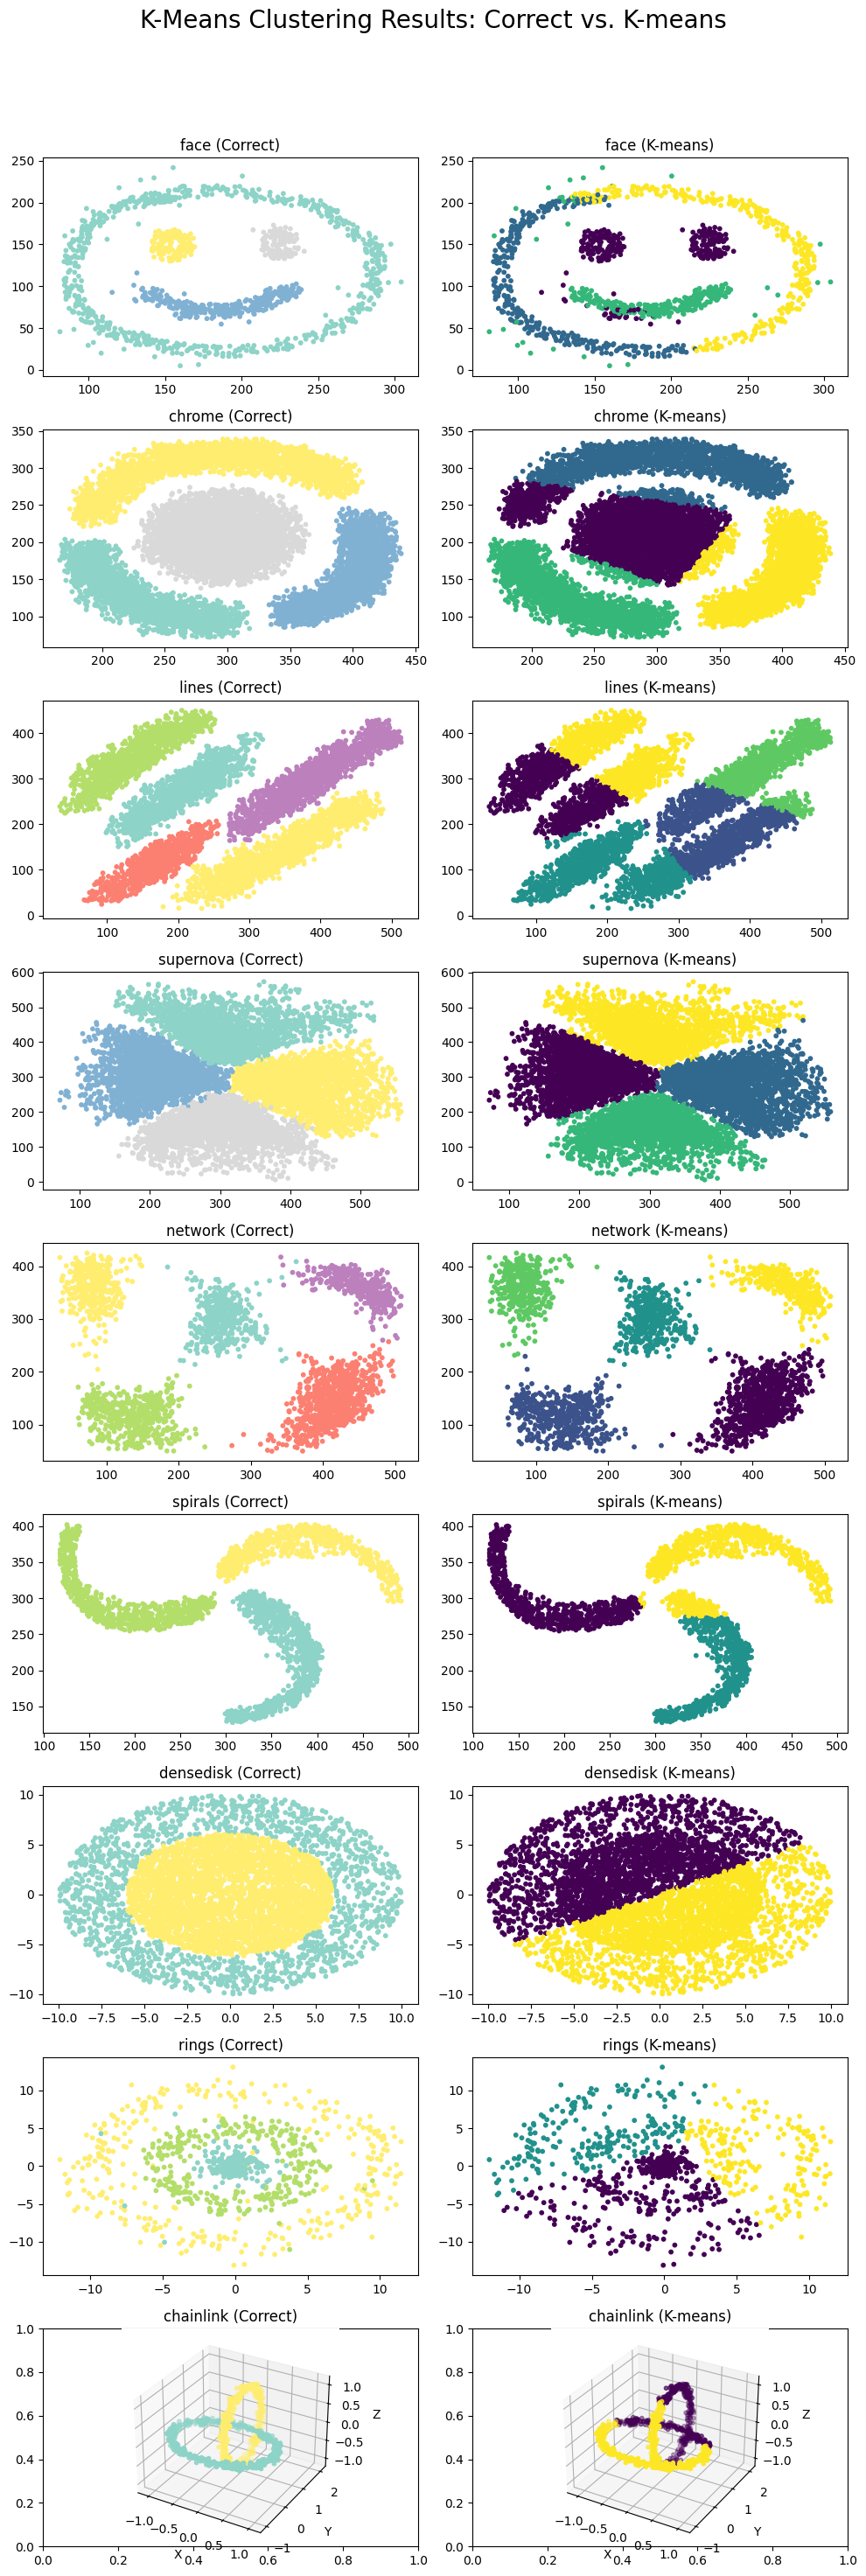

In [185]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(10, 30))
fig.suptitle('K-Means Clustering Results: Correct vs. K-means', size=20)

datasets = {
    "face": (face_df, face_kmeans),
    "chrome": (chrome_df, chrome_kmeans),
    "lines": (lines2_df, lines2_kmeans),
    "supernova": (supernova_df, supernova_kmeans),
    "network": (network_df, network_kmeans),
    "spirals": (spirals_df, spirals_kmeans),
    "densedisk": (densedisk_df, densedisk_kmeans),
    "rings": (rings_df, rings_kmeans),
}

row = 0
for name, (original, clustered) in datasets.items():
    axes[row, 0].scatter(original['x'], original['y'], c=original['color'], s=10, cmap="Set3")
    axes[row, 0].set_title(f"{name} (Correct)", fontsize=12)

    axes[row, 1].scatter(clustered['x'], clustered['y'], c=clustered['Cluster'], s=10, cmap="viridis")
    axes[row, 1].set_title(f"{name} (K-means)", fontsize=12)

    row += 1

original, clustered = chainlink_df, chainlink_kmeans
ax3d_correct = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_kmeans = fig.add_subplot(9, 2, 18, projection='3d')

ax3d_correct.scatter(original['x'], original['y'], original['z'], c=original['color'], cmap="Set3", s=10)
ax3d_correct.set_title("chainlink (Correct)", fontsize=12)
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_kmeans.scatter(clustered['x'], clustered['y'], clustered['z'], c=clustered['Cluster'], cmap="viridis", s=10)
ax3d_kmeans.set_title("chainlink (K-means)", fontsize=12)
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [186]:
face_agg = face_df.copy()
chrome_agg = chrome_df.copy()
lines2_agg = lines2_df.copy()
supernova_agg = supernova_df.copy()
network_agg = network_df.copy()
spirals_agg = spirals_df.copy()
densedisk_agg = densedisk_df.copy()
rings_agg = rings_df.copy()
chainlink_agg = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [187]:
face_agg = face_agg.drop(columns=['color'])
chrome_agg = chrome_agg.drop(columns=['color'])
lines2_agg = lines2_agg.drop(columns=['color'])
supernova_agg = supernova_agg.drop(columns=['color'])
network_agg = network_agg.drop(columns=['color'])
spirals_agg = spirals_agg.drop(columns=['color'])
densedisk_agg = densedisk_agg.drop(columns=['color'])
rings_agg = rings_agg.drop(columns=['color'])
chainlink_agg = chainlink_agg.drop(columns=['color'])

3. Train a Agglomerative Clustering model for each dataset.

In [188]:
agg_face = AgglomerativeClustering(n_clusters=4)
agg_chrome = AgglomerativeClustering(n_clusters=4)
agg_lines2 = AgglomerativeClustering(n_clusters=5)
agg_supernova = AgglomerativeClustering(n_clusters=4)
agg_network = AgglomerativeClustering(n_clusters=5)
agg_spirals = AgglomerativeClustering(n_clusters=3)
agg_densedisk = AgglomerativeClustering(n_clusters=2)
agg_rings = AgglomerativeClustering(n_clusters=3)
agg_chainlink = AgglomerativeClustering(n_clusters=2)

4. Add a "Cluster" column for each data set

In [189]:
face_agg['Cluster'] = agg_face.fit_predict(face_agg)
chrome_agg['Cluster'] = agg_chrome.fit_predict(chrome_agg)
lines2_agg['Cluster'] = agg_lines2.fit_predict(lines2_agg)
supernova_agg['Cluster'] = agg_supernova.fit_predict(supernova_agg)
network_agg['Cluster'] = agg_network.fit_predict(network_agg)
spirals_agg['Cluster'] = agg_spirals.fit_predict(spirals_agg)
densedisk_agg['Cluster'] = agg_densedisk.fit_predict(densedisk_agg)
rings_agg['Cluster'] = agg_rings.fit_predict(rings_agg)
chainlink_agg['Cluster'] = agg_chainlink.fit_predict(chainlink_agg[['x', 'y', 'z']])

5. Plot the Correct cluster and the Agglomerative cluster

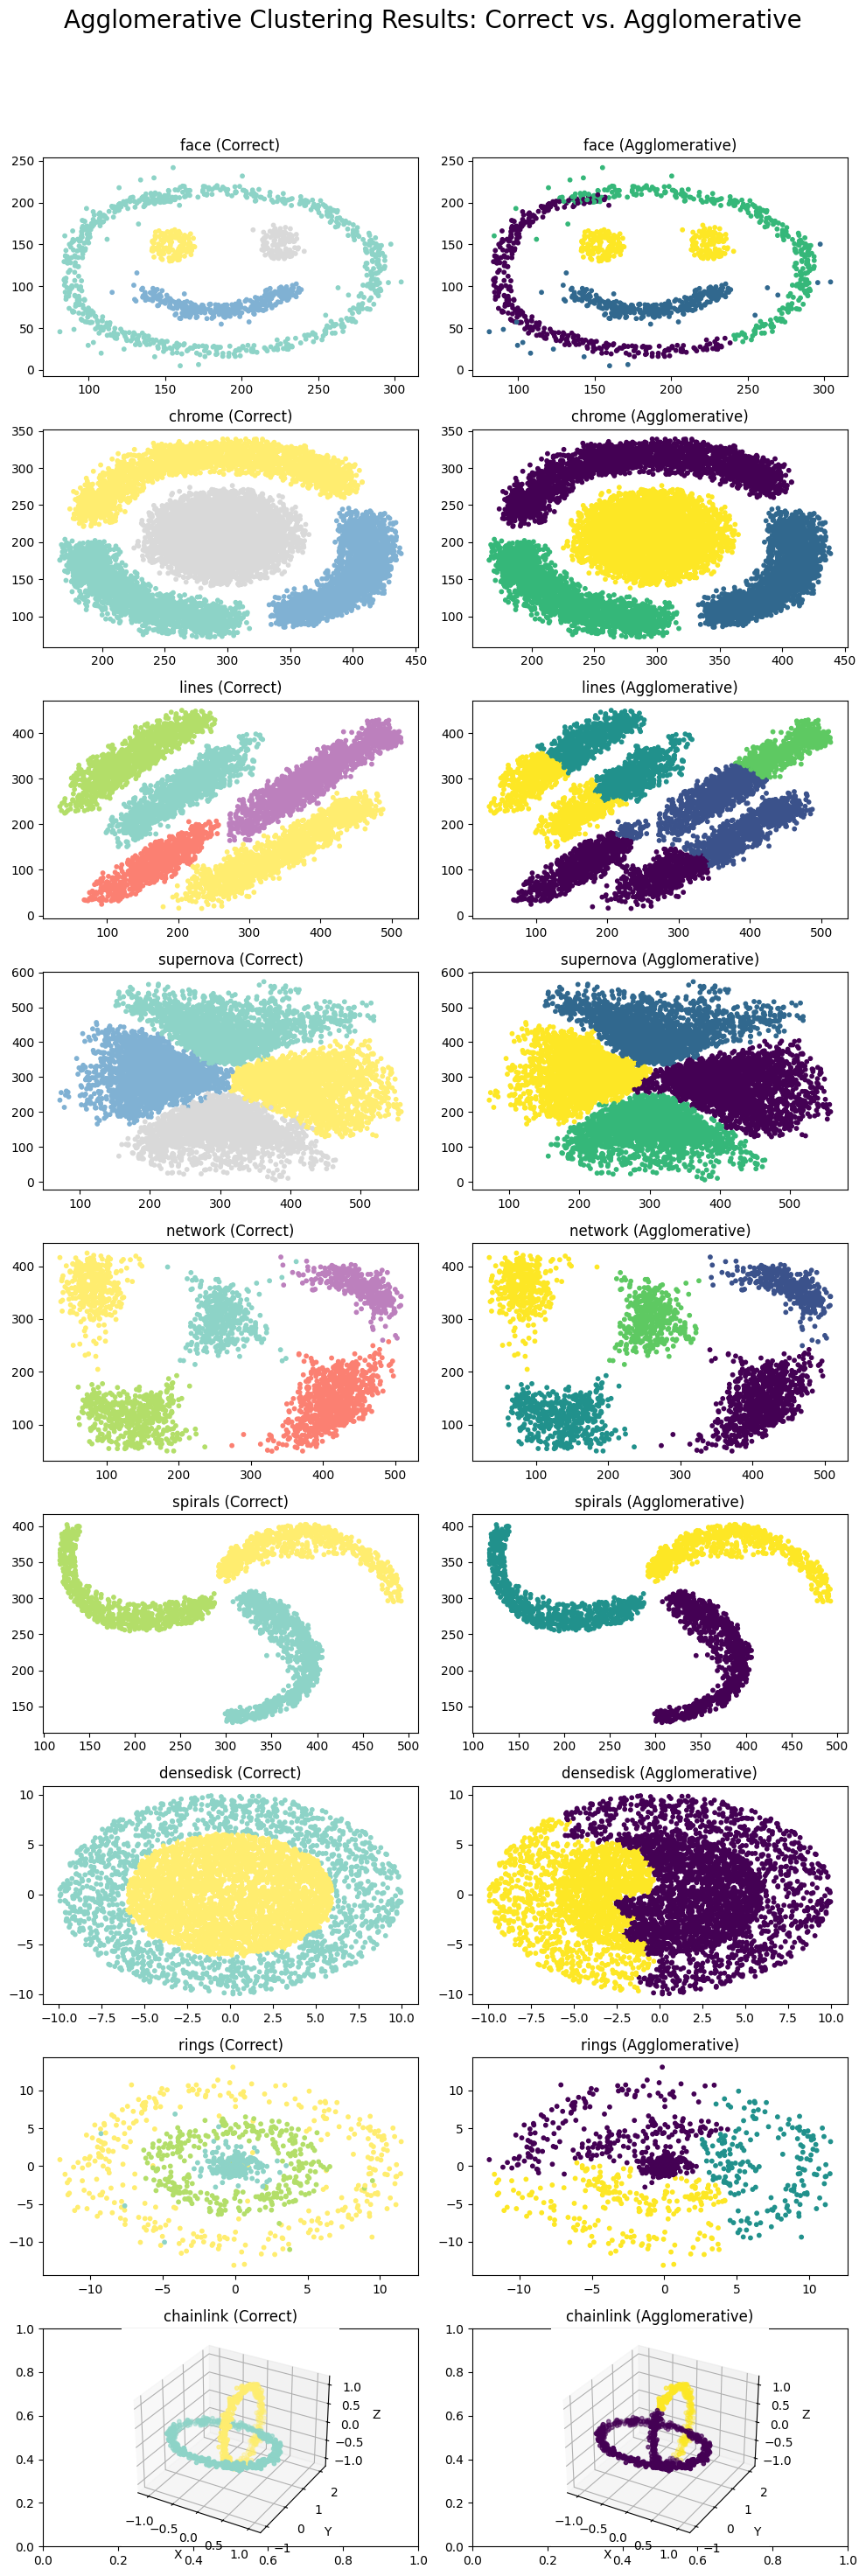

In [190]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(10, 30))
fig.suptitle('Agglomerative Clustering Results: Correct vs. Agglomerative', size=20)

datasets_agg = {
    "face": (face_df, face_agg),
    "chrome": (chrome_df, chrome_agg),
    "lines": (lines2_df, lines2_agg),
    "supernova": (supernova_df, supernova_agg),
    "network": (network_df, network_agg),
    "spirals": (spirals_df, spirals_agg),
    "densedisk": (densedisk_df, densedisk_agg),
    "rings": (rings_df, rings_agg),
}

# Plot each dataset (2D)
row = 0
for name, (original, clustered) in datasets_agg.items():
    axes[row, 0].scatter(original['x'], original['y'], c=original['color'], s=10, cmap="Set3")
    axes[row, 0].set_title(f"{name} (Correct)", fontsize=12)

    axes[row, 1].scatter(clustered['x'], clustered['y'], c=clustered['Cluster'], s=10, cmap="viridis")
    axes[row, 1].set_title(f"{name} (Agglomerative)", fontsize=12)

    row += 1

# Add a 3D plot for "chainlink"
original, clustered = chainlink_df, chainlink_agg
ax3d_correct = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_agg = fig.add_subplot(9, 2, 18, projection='3d')

ax3d_correct.scatter(original['x'], original['y'], original['z'], c=original['color'], cmap="Set3", s=10)
ax3d_correct.set_title("chainlink (Correct)", fontsize=12)
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_agg.scatter(clustered['x'], clustered['y'], clustered['z'], c=clustered['Cluster'], cmap="viridis", s=10)
ax3d_agg.set_title("chainlink (Agglomerative)", fontsize=12)
ax3d_agg.set_xlabel("X")
ax3d_agg.set_ylabel("Y")
ax3d_agg.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [191]:
face_agg = face_df.copy()
chrome_agg = chrome_df.copy()
lines2_agg = lines2_df.copy()
supernova_agg = supernova_df.copy()
network_agg = network_df.copy()
spirals_agg = spirals_df.copy()
densedisk_agg = densedisk_df.copy()
rings_agg = rings_df.copy()
chainlink_agg = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [192]:
face_agg = face_agg.drop(columns=['color'])
chrome_agg = chrome_agg.drop(columns=['color'])
lines2_agg = lines2_agg.drop(columns=['color'])
supernova_agg = supernova_agg.drop(columns=['color'])
network_agg = network_agg.drop(columns=['color'])
spirals_agg = spirals_agg.drop(columns=['color'])
densedisk_agg = densedisk_agg.drop(columns=['color'])
rings_agg = rings_agg.drop(columns=['color'])
chainlink_agg = chainlink_agg.drop(columns=['color'])

3. Train a DBSCAN Clustering model for each dataset.

In [450]:
dbscan_face = DBSCAN(eps=15, min_samples=5)
dbscan_chrome = DBSCAN(eps=10, min_samples=5)
dbscan_lines2 = DBSCAN(eps=15, min_samples=20)
dbscan_supernova = DBSCAN(eps=9, min_samples=14)
dbscan_network = DBSCAN(eps=20, min_samples=4)
dbscan_spirals = DBSCAN(eps=15, min_samples=5)
dbscan_densedisk = DBSCAN(eps=1, min_samples=45)
dbscan_rings = DBSCAN(eps=1, min_samples=20)
dbscan_chainlink = DBSCAN(eps=0.4, min_samples=5)

4. Add a "Cluster" column for each data set

In [451]:
face_agg['Cluster'] = dbscan_face.fit_predict(face_agg)
chrome_agg['Cluster'] = dbscan_chrome.fit_predict(chrome_agg)
lines2_agg['Cluster'] = dbscan_lines2.fit_predict(lines2_agg)
supernova_agg['Cluster'] = dbscan_supernova.fit_predict(supernova_agg)
network_agg['Cluster'] = dbscan_network.fit_predict(network_agg)
spirals_agg['Cluster'] = dbscan_spirals.fit_predict(spirals_agg)
densedisk_agg['Cluster'] = dbscan_densedisk.fit_predict(densedisk_agg)
rings_agg['Cluster'] = dbscan_rings.fit_predict(rings_agg)
chainlink_agg['Cluster'] = dbscan_chainlink.fit_predict(chainlink_agg[['x', 'y', 'z']])

5. Plot the Correct cluster and the DBSCAN cluster

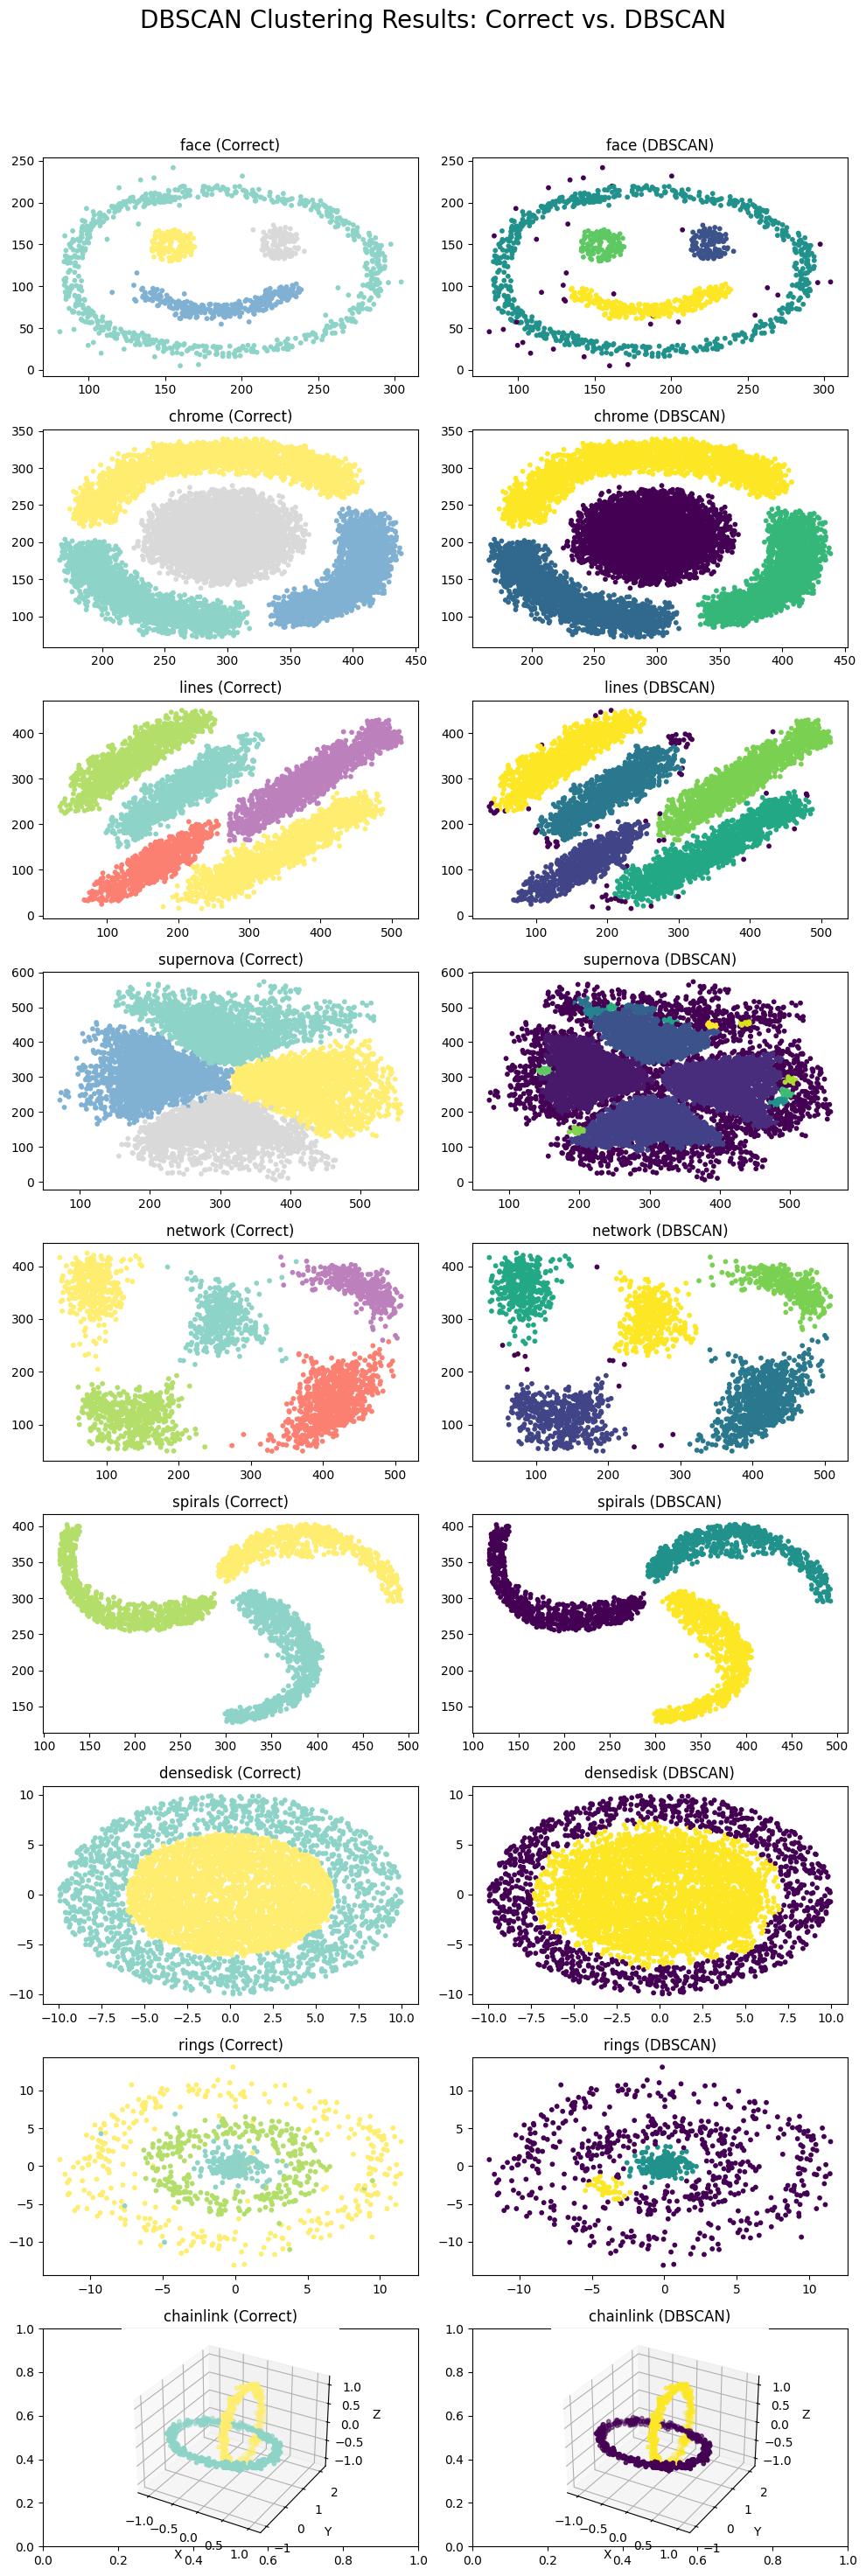

In [452]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(10, 30))
fig.suptitle('DBSCAN Clustering Results: Correct vs. DBSCAN', size=20)

datasets_dbscan = {
    "face": (face_df, face_agg),
    "chrome": (chrome_df, chrome_agg),
    "lines": (lines2_df, lines2_agg),
    "supernova": (supernova_df, supernova_agg),
    "network": (network_df, network_agg),
    "spirals": (spirals_df, spirals_agg),
    "densedisk": (densedisk_df, densedisk_agg),
    "rings": (rings_df, rings_agg),
}

# Plot each dataset (2D)
row = 0
for name, (original, clustered) in datasets_dbscan.items():
    axes[row, 0].scatter(original['x'], original['y'], c=original['color'], s=10, cmap="Set3")
    axes[row, 0].set_title(f"{name} (Correct)", fontsize=12)

    axes[row, 1].scatter(clustered['x'], clustered['y'], c=clustered['Cluster'], s=10, cmap="viridis")
    axes[row, 1].set_title(f"{name} (DBSCAN)", fontsize=12)

    row += 1

# Add a 3D plot for "chainlink"
original, clustered = chainlink_df, chainlink_agg
ax3d_correct = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_dbscan = fig.add_subplot(9, 2, 18, projection='3d')

ax3d_correct.scatter(original['x'], original['y'], original['z'], c=original['color'], cmap="Set3", s=10)
ax3d_correct.set_title("chainlink (Correct)", fontsize=12)
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_dbscan.scatter(clustered['x'], clustered['y'], clustered['z'], c=clustered['Cluster'], cmap="viridis", s=10)
ax3d_dbscan.set_title("chainlink (DBSCAN)", fontsize=12)
ax3d_dbscan.set_xlabel("X")
ax3d_dbscan.set_ylabel("Y")
ax3d_dbscan.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

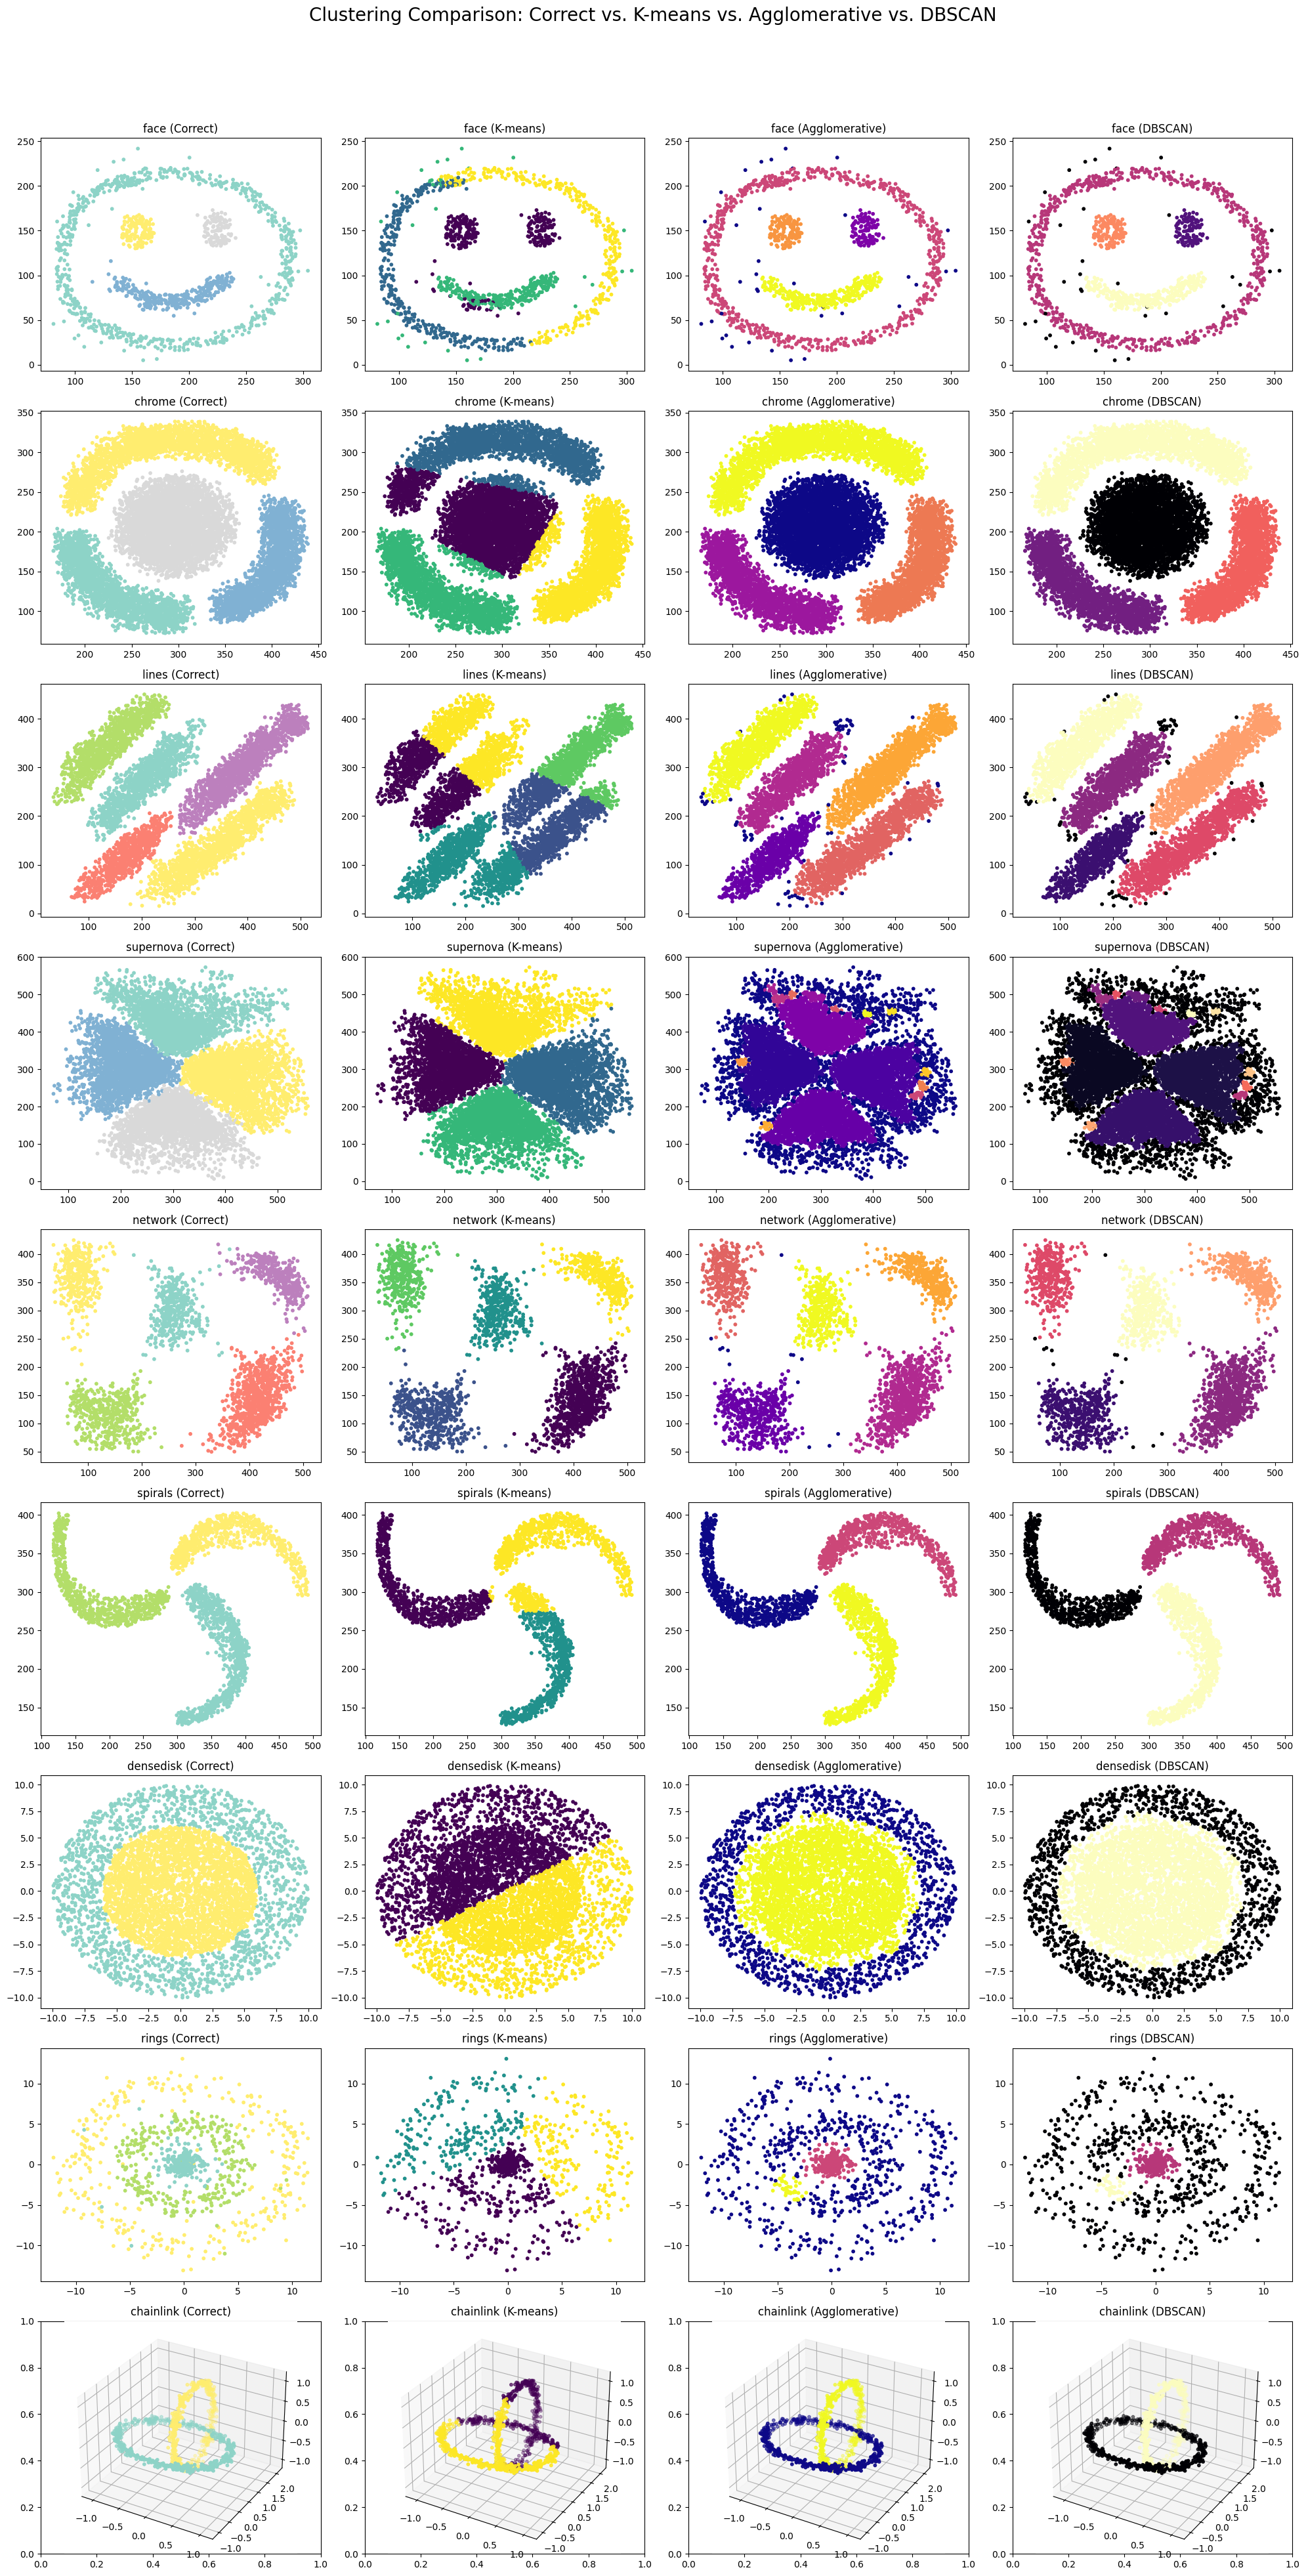

In [453]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 40))
fig.suptitle('Clustering Comparison: Correct vs. K-means vs. Agglomerative vs. DBSCAN', size=20)

datasets_all = {
    "face": (face_df, face_kmeans, face_agg, face_agg),
    "chrome": (chrome_df, chrome_kmeans, chrome_agg, chrome_agg),
    "lines": (lines2_df, lines2_kmeans, lines2_agg, lines2_agg),
    "supernova": (supernova_df, supernova_kmeans, supernova_agg, supernova_agg),
    "network": (network_df, network_kmeans, network_agg, network_agg),
    "spirals": (spirals_df, spirals_kmeans, spirals_agg, spirals_agg),
    "densedisk": (densedisk_df, densedisk_kmeans, densedisk_agg, densedisk_agg),
    "rings": (rings_df, rings_kmeans, rings_agg, rings_agg),
}

row = 0
for name, (original_df, kmeans_df, agg_df, dbscan_df) in datasets_all.items():
    axes[row, 0].scatter(original_df['x'], original_df['y'], c=original_df['color'], s=10, cmap="Set3")
    axes[row, 0].set_title(f"{name} (Correct)", fontsize=12)

    axes[row, 1].scatter(kmeans_df['x'], kmeans_df['y'], c=kmeans_df['Cluster'], s=10, cmap="viridis")
    axes[row, 1].set_title(f"{name} (K-means)", fontsize=12)

    axes[row, 2].scatter(agg_df['x'], agg_df['y'], c=agg_df['Cluster'], s=10, cmap="plasma")
    axes[row, 2].set_title(f"{name} (Agglomerative)", fontsize=12)

    axes[row, 3].scatter(dbscan_df['x'], dbscan_df['y'], c=dbscan_df['Cluster'], s=10, cmap="magma")
    axes[row, 3].set_title(f"{name} (DBSCAN)", fontsize=12)

    row += 1

# 3D plot for chainlink
original_df, kmeans_df, agg_df, dbscan_df = chainlink_df, chainlink_kmeans, chainlink_agg, chainlink_agg

ax3d_correct = fig.add_subplot(9, 4, 33, projection='3d')
ax3d_kmeans = fig.add_subplot(9, 4, 34, projection='3d')
ax3d_agg = fig.add_subplot(9, 4, 35, projection='3d')
ax3d_dbscan = fig.add_subplot(9, 4, 36, projection='3d')

ax3d_correct.scatter(original_df['x'], original_df['y'], original_df['z'], c=original_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("chainlink (Correct)", fontsize=12)

ax3d_kmeans.scatter(kmeans_df['x'], kmeans_df['y'], kmeans_df['z'], c=kmeans_df['Cluster'], cmap="viridis", s=10)
ax3d_kmeans.set_title("chainlink (K-means)", fontsize=12)

ax3d_agg.scatter(agg_df['x'], agg_df['y'], agg_df['z'], c=agg_df['Cluster'], cmap="plasma", s=10)
ax3d_agg.set_title("chainlink (Agglomerative)", fontsize=12)

ax3d_dbscan.scatter(dbscan_df['x'], dbscan_df['y'], dbscan_df['z'], c=dbscan_df['Cluster'], cmap="magma", s=10)
ax3d_dbscan.set_title("chainlink (DBSCAN)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()